In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm
from fbprophet import Prophet


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
from google.colab import files
covid = files.upload()

Saving covid_19_data.csv to covid_19_data (1).csv


In [ ]:
import io
covid = pd.read_csv(io.BytesIO(covid['covid_19_data.csv']))

In [ ]:
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [ ]:
#Extracting India's data 
covid_india=covid[covid['Country/Region']=="India"]

#Extracting other countries for comparison of worst affected countries
covid_spain=covid[covid['Country/Region']=="Spain"]
covid_us=covid[covid['Country/Region']=="US"]
covid_italy=covid[covid['Country/Region']=="Italy"]
covid_iran=covid[covid['Country/Region']=="Iran"]
covid_france=covid[covid['Country/Region']=="France"]
covid_uk=covid[covid['Country/Region']=="UK"]
covid_br=covid[covid['Country/Region']=="Brazil"]
covid_russia=covid[covid['Country/Region']=="Russia"]

#Extracting data of neighbouring countries
covid_pak=covid[covid['Country/Region']=="Pakistan"]
covid_china=covid[covid['Country/Region']=="Mainland China"]
covid_afg=covid[covid['Country/Region']=="Afghanistan"]
covid_nepal=covid[covid['Country/Region']=="Nepal"]
covid_bhutan=covid[covid['Country/Region']=="Bhutan"]
covid_lanka=covid[covid["Country/Region"]=="Sri Lanka"]
covid_ban=covid[covid["Country/Region"]=="Bangladesh"]

In [ ]:
#Converting the date into Datetime format
covid_india["ObservationDate"]=pd.to_datetime(covid_india["ObservationDate"])
covid_spain["ObservationDate"]=pd.to_datetime(covid_spain["ObservationDate"])
covid_us["ObservationDate"]=pd.to_datetime(covid_us["ObservationDate"])
covid_italy["ObservationDate"]=pd.to_datetime(covid_italy["ObservationDate"])
covid_iran["ObservationDate"]=pd.to_datetime(covid_iran["ObservationDate"])
covid_france["ObservationDate"]=pd.to_datetime(covid_france["ObservationDate"])
covid_uk["ObservationDate"]=pd.to_datetime(covid_uk["ObservationDate"])
covid_br["ObservationDate"]=pd.to_datetime(covid_br["ObservationDate"])
covid_russia["ObservationDate"]=pd.to_datetime(covid_russia["ObservationDate"])

covid_pak["ObservationDate"]=pd.to_datetime(covid_pak["ObservationDate"])
covid_china["ObservationDate"]=pd.to_datetime(covid_china["ObservationDate"])
covid_afg["ObservationDate"]=pd.to_datetime(covid_afg["ObservationDate"])
covid_nepal["ObservationDate"]=pd.to_datetime(covid_nepal["ObservationDate"])
covid_bhutan["ObservationDate"]=pd.to_datetime(covid_bhutan["ObservationDate"])
covid_lanka["ObservationDate"]=pd.to_datetime(covid_lanka["ObservationDate"])
covid_ban["ObservationDate"]=pd.to_datetime(covid_ban["ObservationDate"])

In [ ]:
#Grouping the data based on the Date 
india_datewise=covid_india.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
spain_datewise=covid_spain.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
us_datewise=covid_us.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
italy_datewise=covid_italy.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
iran_datewise=covid_iran.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
france_datewise=covid_france.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
uk_datewise=covid_uk.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
brazil_datewise=covid_br.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
russia_datewise=covid_russia.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

pak_datewise=covid_pak.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
china_datewise=covid_china.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
afg_datewise=covid_afg.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
nepal_datewise=covid_nepal.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
bhutan_datewise=covid_bhutan.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
lanka_datewise=covid_lanka.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
ban_datewise=covid_ban.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [ ]:
#Adding week column to perfom weekly analysis further ahead
india_datewise["WeekofYear"]=india_datewise.index.weekofyear
spain_datewise["WeekofYear"]=spain_datewise.index.weekofyear
us_datewise["WeekofYear"]=us_datewise.index.weekofyear
italy_datewise["WeekofYear"]=italy_datewise.index.weekofyear
iran_datewise["WeekofYear"]=iran_datewise.index.weekofyear
france_datewise["WeekofYear"]=france_datewise.index.weekofyear
uk_datewise["WeekofYear"]=uk_datewise.index.weekofyear
brazil_datewise["WeekofYear"]=brazil_datewise.index.weekofyear
russia_datewise["WeekofYear"]=russia_datewise.index.weekofyear

pak_datewise["WeekofYear"]=pak_datewise.index.weekofyear
china_datewise["WeekofYear"]=china_datewise.index.weekofyear
afg_datewise["WeekofYear"]=afg_datewise.index.weekofyear
nepal_datewise["WeekofYear"]=nepal_datewise.index.weekofyear
bhutan_datewise["WeekofYear"]=bhutan_datewise.index.weekofyear
lanka_datewise["WeekofYear"]=lanka_datewise.index.weekofyear
ban_datewise["WeekofYear"]=ban_datewise.index.weekofyear

In [ ]:
india_datewise["Days Since"]=(india_datewise.index-india_datewise.index[0])
india_datewise["Days Since"]=india_datewise["Days Since"].dt.days

In [ ]:
No_Lockdown=covid_india[covid_india["ObservationDate"]<pd.to_datetime("2020-03-21")]
Lockdown_1=covid_india[(covid_india["ObservationDate"]>=pd.to_datetime("2020-03-21"))&(covid_india["ObservationDate"]<pd.to_datetime("2020-04-15"))]
Lockdown_2=covid_india[(covid_india["ObservationDate"]>=pd.to_datetime("2020-04-15"))&(covid_india["ObservationDate"]<pd.to_datetime("2020-05-04"))]
Lockdown_3=covid_india[(covid_india["ObservationDate"]>=pd.to_datetime("2020-05-04"))&(covid_india["ObservationDate"]<pd.to_datetime("2020-05-19"))]
Lockdown_4=covid_india[(covid_india["ObservationDate"]>=pd.to_datetime("2020-05-19"))&(covid_india["ObservationDate"]<=pd.to_datetime("2020-05-31"))]
Unlock_1=covid_india[(covid_india["ObservationDate"]>=pd.to_datetime("2020-06-01"))&(covid_india["ObservationDate"]<=pd.to_datetime("2020-06-30"))]
Unlock_2=covid_india[(covid_india["ObservationDate"]>=pd.to_datetime("2020-07-01"))]

No_Lockdown_datewise=No_Lockdown.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
Lockdown_1_datewise=Lockdown_1.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
Lockdown_2_datewise=Lockdown_2.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
Lockdown_3_datewise=Lockdown_3.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
Lockdown_4_datewise=Lockdown_4.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
Unlock_1_datewise=Unlock_1.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
Unlock_2_datewise=Unlock_2.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [ ]:
covid["ObservationDate"]=pd.to_datetime(covid["ObservationDate"])
grouped_country=covid.groupby(["Country/Region","ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [ ]:
grouped_country["Active Cases"]=grouped_country["Confirmed"]-grouped_country["Recovered"]-grouped_country["Deaths"]
grouped_country["log_confirmed"]=np.log(grouped_country["Confirmed"])
grouped_country["log_active"]=np.log(grouped_country["Active Cases"])

Polynomial regression

In [ ]:
train_ml=india_datewise.iloc[:int(india_datewise.shape[0]*0.95)]
valid_ml=india_datewise.iloc[int(india_datewise.shape[0]*0.95):]
model_scores=[]

In [ ]:
poly = PolynomialFeatures(degree = 6) 

In [ ]:
train_poly=poly.fit_transform(np.array(train_ml["Days Since"]).reshape(-1,1))
valid_poly=poly.fit_transform(np.array(valid_ml["Days Since"]).reshape(-1,1))
y=train_ml["Confirmed"]

In [ ]:
linreg=LinearRegression(normalize=True)
linreg.fit(train_poly,y)

LinearRegression(normalize=True)

In [ ]:
prediction_poly=linreg.predict(valid_poly)
rmse_poly=np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_poly))
model_scores.append(rmse_poly)
print("Root Mean Squared Error for Polynomial Regression: ",rmse_poly)

Root Mean Squared Error for Polynomial Regression:  2280842.7581361886


In [ ]:
comp_data=poly.fit_transform(np.array(india_datewise["Days Since"]).reshape(-1,1))
plt.figure(figsize=(11,6))
predictions_poly=linreg.predict(comp_data)
fig=go.Figure()
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=india_datewise.index, y=predictions_poly,
                    mode='lines',name="Polynomial Regression Best Fit",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Polynomial Regression Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 792x432 with 0 Axes>

In [ ]:
new_date=[]
new_prediction_poly=[]
for i in range(1,18):
    new_date.append(india_datewise.index[-1]+timedelta(days=i))
    new_date_poly=poly.fit_transform(np.array(india_datewise["Days Since"].max()+i).reshape(-1,1))
    new_prediction_poly.append(linreg.predict(new_date_poly)[0])

In [ ]:
model_predictions=pd.DataFrame(zip(new_date,new_prediction_poly),columns=["Date","Polynomial Regression Prediction"])
model_predictions.head()

,Date,Polynomial Regression Prediction
0,2021-05-30,3.403157e+07
1,2021-05-31,3.477220e+07
2,2021-06-01,3.553059e+07
3,2021-06-02,3.630703e+07
4,2021-06-03,3.710183e+07


SVM

In [ ]:
train_ml=india_datewise.iloc[:int(india_datewise.shape[0]*0.95)]
valid_ml=india_datewise.iloc[int(india_datewise.shape[0]*0.95):]

In [ ]:
svm=SVR(C=0.01,degree=7,kernel='poly')

In [ ]:
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),train_ml["Confirmed"])

SVR(C=0.01, degree=7, kernel='poly')

In [ ]:
prediction_svm=svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
rmse_svm=np.sqrt(mean_squared_error(prediction_svm,valid_ml["Confirmed"]))
model_scores.append(rmse_svm)
print("Root Mean Square Error for SVR Model: ",rmse_svm)

Root Mean Square Error for SVR Model:  3965132.809816331


In [ ]:
plt.figure(figsize=(11,6))
predictions=svm.predict(np.array(india_datewise["Days Since"]).reshape(-1,1))
fig=go.Figure()
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=india_datewise.index, y=predictions,
                    mode='lines',name="Support Vector Machine Best fit Kernel",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Support Vectore Machine Regressor Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 792x432 with 0 Axes>

In [ ]:
new_date=[]
new_prediction_svm=[]
for i in range(1,18):
    new_date.append(india_datewise.index[-1]+timedelta(days=i))
    new_prediction_svm.append(svm.predict(np.array(india_datewise["Days Since"].max()+i).reshape(-1,1))[0])

In [ ]:
model_predictions["SVM Prediction"]=new_prediction_svm
model_predictions.head()

,Date,Polynomial Regression Prediction,SVM Prediction
0,2021-05-30,3.403157e+07,2.451043e+07
1,2021-05-31,3.477220e+07,2.480965e+07
2,2021-06-01,3.553059e+07,2.511259e+07
3,2021-06-02,3.630703e+07,2.541927e+07
4,2021-06-03,3.710183e+07,2.572973e+07


Time series Forecast models

Holt't Linear method

In [ ]:
model_train=india_datewise.iloc[:int(india_datewise.shape[0]*0.95)]
valid=india_datewise.iloc[int(india_datewise.shape[0]*0.95):]
y_pred=valid.copy()

In [ ]:
holt=Holt(np.asarray(model_train["Confirmed"])).fit(smoothing_level=0.3, smoothing_slope=1.2)

In [ ]:
y_pred["Holt"]=holt.forecast(len(valid))
rmse_holt_linear=np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt"]))
model_scores.append(rmse_holt_linear)
print("Root Mean Square Error Holt's Linear Model: ",rmse_holt_linear)

Root Mean Square Error Holt's Linear Model:  857757.6976798134


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["Holt"],
                    mode='lines+markers',name="Prediction of Confirmed Cases",))
fig.update_layout(title="Confirmed Cases Holt's Linear Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
holt_new_prediction=[]
for i in range(1,18):
    holt_new_prediction.append(holt.forecast((len(valid)+i))[-1])

model_predictions["Holt's Linear Model Prediction"]=holt_new_prediction
model_predictions.head()

,Date,Polynomial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction
0,2021-05-30,3.403157e+07,2.451043e+07,3.031139e+07
1,2021-05-31,3.477220e+07,2.480965e+07,3.068133e+07
2,2021-06-01,3.553059e+07,2.511259e+07,3.105127e+07
3,2021-06-02,3.630703e+07,2.541927e+07,3.142121e+07
4,2021-06-03,3.710183e+07,2.572973e+07,3.179115e+07


Holt's Winder model


In [ ]:
model_train=india_datewise.iloc[:int(india_datewise.shape[0]*0.95)]
valid=india_datewise.iloc[int(india_datewise.shape[0]*0.95):]
y_pred=valid.copy()

In [ ]:
es=ExponentialSmoothing(np.asarray(model_train['Confirmed']),seasonal_periods=15, trend='mul', seasonal='mul').fit()

In [ ]:
y_pred["Holt's Winter Model"]=es.forecast(len(valid))
rmse_holt_winter=np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt's Winter Model"]))
model_scores.append(rmse_holt_winter)
print("Root Mean Square Error for Holt's Winter Model: ",rmse_holt_winter)

Root Mean Square Error for Holt's Winter Model:  2830471.0718961703


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["Holt\'s Winter Model"],
                    mode='lines+markers',name="Prediction of Confirmed Cases",))
fig.update_layout(title="Confirmed Cases Holt's Winter Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
holt_winter_new_prediction=[]
for i in range(1,18):
    holt_winter_new_prediction.append(es.forecast((len(valid)+i))[-1])
model_predictions["Holt's Winter Model Prediction"]=holt_winter_new_prediction
model_predictions.head()

,Date,Polynomial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction
0,2021-05-30,3.403157e+07,2.451043e+07,3.031139e+07,3.469835e+07
1,2021-05-31,3.477220e+07,2.480965e+07,3.068133e+07,3.539108e+07
2,2021-06-01,3.553059e+07,2.511259e+07,3.105127e+07,3.608589e+07
3,2021-06-02,3.630703e+07,2.541927e+07,3.142121e+07,3.678747e+07
4,2021-06-03,3.710183e+07,2.572973e+07,3.179115e+07,3.755991e+07


Prophet

In [ ]:
prophet_c=Prophet(interval_width=0.95,weekly_seasonality=True,)
prophet_confirmed=pd.DataFrame(zip(list(india_datewise.index),list(india_datewise["Confirmed"])),columns=['ds','y'])

In [ ]:
prophet_c.fit(prophet_confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast_c=prophet_c.make_future_dataframe(periods=17)
forecast_confirmed=forecast_c.copy()

In [ ]:
confirmed_forecast=prophet_c.predict(forecast_c)

In [ ]:
rmse_prophet=np.sqrt(mean_squared_error(india_datewise["Confirmed"],confirmed_forecast['yhat'].head(india_datewise.shape[0])))
model_scores.append(rmse_prophet)
print("Root Mean Squared Error for Prophet Model: ",rmse_prophet)

Root Mean Squared Error for Prophet Model:  1112918.2427191476


Figure(720x432)


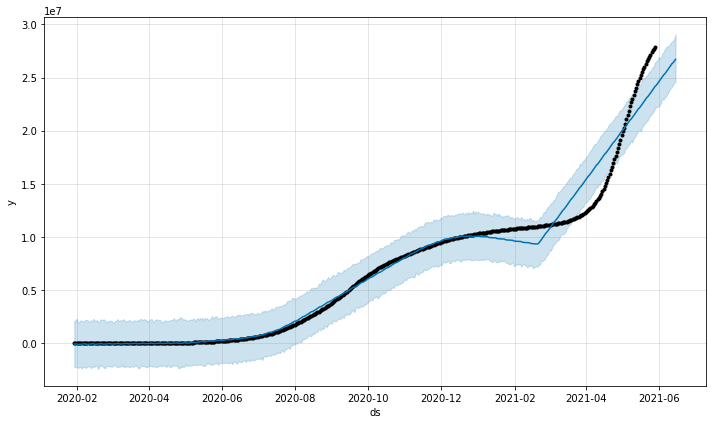

In [ ]:
print(prophet_c.plot(confirmed_forecast))

Figure(648x432)


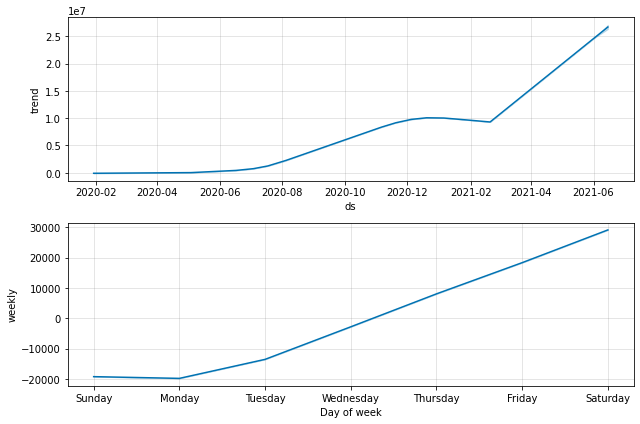

In [ ]:
print(prophet_c.plot_components(confirmed_forecast))

In [ ]:
model_predictions["Prophet's Prediction"]=list(confirmed_forecast["yhat"].tail(17))
model_predictions["Prophet's Upper Bound"]=list(confirmed_forecast["yhat_upper"].tail(17))
model_predictions.head()

,Date,Polynomial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,Prophet's Prediction,Prophet's Upper Bound
0,2021-05-30,3.403157e+07,2.451043e+07,3.031139e+07,3.469835e+07,2.427854e+07,2.655395e+07
1,2021-05-31,3.477220e+07,2.480965e+07,3.068133e+07,3.539108e+07,2.442943e+07,2.663346e+07
2,2021-06-01,3.553059e+07,2.511259e+07,3.105127e+07,3.608589e+07,2.458716e+07,2.695658e+07
3,2021-06-02,3.630703e+07,2.541927e+07,3.142121e+07,3.678747e+07,2.474935e+07,2.681554e+07
4,2021-06-03,3.710183e+07,2.572973e+07,3.179115e+07,3.755991e+07,2.491167e+07,2.689919e+07


In [ ]:
models=["Polynomial Regression","Support Vector Machine Regresssor","Holt's Linear Model",
       "Holt's Winter Model","Facebook's Prophet Model"]

In [ ]:
model_evaluation=pd.DataFrame(list(zip(models,model_scores)),columns=["Model Name","Root Mean Squared Error"])
model_evaluation=model_evaluation.sort_values(["Root Mean Squared Error"])
model_evaluation.style.background_gradient(cmap='Reds')

,Model Name,Root Mean Squared Error
2,Holt's Linear Model,857757.697680
4,Facebook's Prophet Model,1112918.242719
0,Polynomial Regression,2280842.758136
3,Holt's Winter Model,2830471.071896
1,Support Vector Machine Regresssor,3965132.809816


In [ ]:
model_predictions["Average of Predictions Models"]=model_predictions.mean(axis=1)
show_predictions=model_predictions.head()
show_predictions

,Date,Polynomial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,Prophet's Prediction,Prophet's Upper Bound,Average of Predictions Models
0,2021-05-30,3.403157e+07,2.451043e+07,3.031139e+07,3.469835e+07,2.427854e+07,2.655395e+07,2.906404e+07
1,2021-05-31,3.477220e+07,2.480965e+07,3.068133e+07,3.539108e+07,2.442943e+07,2.663346e+07,2.945286e+07
2,2021-06-01,3.553059e+07,2.511259e+07,3.105127e+07,3.608589e+07,2.458716e+07,2.695658e+07,2.988735e+07
3,2021-06-02,3.630703e+07,2.541927e+07,3.142121e+07,3.678747e+07,2.474935e+07,2.681554e+07,3.024998e+07
4,2021-06-03,3.710183e+07,2.572973e+07,3.179115e+07,3.755991e+07,2.491167e+07,2.689919e+07,3.066558e+07


LSTM

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, Dense, Flatten, Dropout, BatchNormalization,LSTM,SeparableConv1D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_confirmed = pd.read_csv('/content/time_series_covid_19_confirmed (1).csv')
df_deaths = pd.read_csv('/content/time_series_covid_19_deaths (1).csv')
df_recovered = pd.read_csv('/content/time_series_covid_19_recovered (1).csv')

In [ ]:
df_list = [df_confirmed,df_deaths,df_recovered]
cases = ['Confirmed', 'Deaths', 'Recovered', 'Active']
case_color = ['orange','red','green','blue']
case_dict = {cases[i]:case_color[i] for i in range(len(cases))}

In [ ]:
## creating time series data

time_series_data = pd.DataFrame()
for i in range(len(cases)-1):
    df =  pd.DataFrame(df_list[i][df_list[i].columns[4:]].sum(),columns=[cases[i]])
    time_series_data = pd.concat([time_series_data,df],axis = 1)
time_series_data.index = pd.to_datetime(time_series_data.index,format='%m/%d/%y')
time_series_data['Active'] = time_series_data['Confirmed'] - time_series_data['Deaths'] - time_series_data['Recovered']
time_series_data= time_series_data.rename_axis('ObservationDate').reset_index()

In [ ]:
time_series_data.head(10).style.background_gradient(cmap='PuBu')

,ObservationDate,Confirmed,Deaths,Recovered,Active
0,2020-01-22 00:00:00,557,17,30,510
1,2020-01-23 00:00:00,655,18,32,605
2,2020-01-24 00:00:00,941,26,39,876
3,2020-01-25 00:00:00,1433,42,42,1349
4,2020-01-26 00:00:00,2118,56,56,2006
5,2020-01-27 00:00:00,2927,82,65,2780
6,2020-01-28 00:00:00,5578,131,108,5339
7,2020-01-29 00:00:00,6167,133,127,5907
8,2020-01-30 00:00:00,8235,171,145,7919
9,2020-01-31 00:00:00,9927,213,225,9489


In [ ]:
country_wise_data = pd.DataFrame()
for i in range(len(cases)-1):
    series =  df_list[i][df_list[i].columns[4:]].sum(axis = 1)
    df = pd.concat([df_list[i]['Country/Region'] ,series],axis = 1)
    df = df.groupby('Country/Region').sum().rename(columns = {0:cases[i]})
    country_wise_data = pd.concat([country_wise_data,df],axis = 1)
country_wise_data['Active'] = country_wise_data['Confirmed'] - country_wise_data['Deaths'] - country_wise_data['Recovered']
country_wise_data = country_wise_data.reset_index()

In [ ]:
dataset = time_series_data.iloc[:,1].values #using only confirmed cases
dataset.shape

(494,)

In [ ]:
#Feature scaling
split = round(0.8*len(dataset))
dataset = dataset.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(dataset[:split]) #fit only on the training data which is the first 80%
dataset_n = scaler.transform(dataset).flatten()
dataset_n.shape

(494,)

In [ ]:
def create_dataset(df,previous,split_ratio):
    X, Y = [], []
    for i in range(len(df)-previous):
        a = df[i:(i+previous)]
        X.append(a)
        y = df[i+previous]
        Y.append(y)
    X = np.array(X).reshape(-1,T,1)
    Y = np.array(Y)
    N = len(X)
    split = round(split_ratio*len(df)) 
    X_train = X[:split]
    X_test = X[split:]
    Y_train = Y[:split]
    Y_test = Y[split:]
    print("X.shape", X.shape, "Y.shape", Y.shape)
    print("X_train.shape", X_train.shape, "Y_train.shape", Y_train.shape)
    print("X_test.shape", X_test.shape, "Y_test.shape", Y_test.shape)
    return X,X_train,X_test,Y,Y_train,Y_test

In [ ]:
T = 5  #number of past days used to predict the value for the current day
X,X_train,X_test,Y,Y_train,Y_test = create_dataset(dataset_n,T,0.8) #80% of data for training and 20% for testing

X.shape (489, 5, 1) Y.shape (489,)
X_train.shape (395, 5, 1) Y_train.shape (395,)
X_test.shape (94, 5, 1) Y_test.shape (94,)


In [ ]:
def plotLearningCurve(history,epochnum,batchnum):
  epochRange = range(1,epochnum+1)
  plt.figure(figsize = (5,5))
  plt.plot(epochRange,history.history['loss'],'b',label = 'Training Loss')
  plt.plot(epochRange,history.history['val_loss'],'r',label = 'Validation Loss')
  plt.xlabel('Epoch', fontsize = 15)
  plt.ylabel('Loss', fontsize = 15)
  plt.grid(color='gray', linestyle='--')
  plt.legend()
  plt.title('LOSS, Epochs={}, Batch={}'.format(epochnum, batchnum))
  plt.show()

In [ ]:
def lstm_model(previous):
    i = Input(shape=(previous,1)) #input shape is n-timesteps x n-features
    x = Conv1D(filters=64, kernel_size= 5, strides=3, padding="causal", activation="relu")(i)
    x = LSTM(64, return_sequences=True)(x)
    x = Dropout(0.4)(x)
    x = LSTM(64,return_sequences=True)(x)
    x = Dropout(0.4)(x)
    x = LSTM(64)(x)
    x = Dropout(0.2)(x)
    x = Dense(1)(x)
    model = Model(i, x)
    model.summary()
    return model

In [ ]:
model = lstm_model(T)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5, 1)]            0         
                                                                 
 conv1d (Conv1D)             (None, 2, 64)             384       
                                                                 
 lstm (LSTM)                 (None, 2, 64)             33024     
                                                                 
 dropout (Dropout)           (None, 2, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 2, 64)             33024     
                                                                 
 dropout_1 (Dropout)         (None, 2, 64)             0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024 

In [ ]:
 model.compile(loss = 'mse',
              optimizer = 'adam')

In [ ]:
batchnum = 64
epochnum = 100
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.8, 
                                            min_lr=1e-10)
early_stop = EarlyStopping(monitor='val_loss',patience=50,restore_best_weights=True)
r = model.fit(X_train,
                    Y_train,
                    batch_size=batchnum,
                    epochs=epochnum,
                    validation_split=0.2,
                    shuffle=False, #time_series
                    callbacks=[learning_rate_reduction])

Epoch 1/100
5/5 [==============================] - 8s 387ms/step - loss: 0.0514 - val_loss: 0.6722 - lr: 0.0010
Epoch 2/100
5/5 [==============================] - 0s 17ms/step - loss: 0.0439 - val_loss: 0.6246 - lr: 0.0010
Epoch 3/100
5/5 [==============================] - 0s 17ms/step - loss: 0.0365 - val_loss: 0.5685 - lr: 0.0010
Epoch 4/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0305 - val_loss: 0.5059 - lr: 0.0010
Epoch 5/100
5/5 [==============================] - 0s 19ms/step - loss: 0.0267 - val_loss: 0.4434 - lr: 0.0010
Epoch 6/100
5/5 [==============================] - 0s 17ms/step - loss: 0.0250 - val_loss: 0.3907 - lr: 0.0010
Epoch 7/100
5/5 [==============================] - 0s 19ms/step - loss: 0.0253 - val_loss: 0.3530 - lr: 0.0010
Epoch 8/100
5/5 [==============================] - 0s 17ms/step - loss: 0.0259 - val_loss: 0.3305 - lr: 0.0010
Epoch 9/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0254 - val_loss: 0.3159 - lr: 0.0010


In [ ]:
n_epochs = len(r.history['loss'])

In [ ]:
print("Train score:", model.evaluate(X_train,Y_train))
print("Test score:", model.evaluate(X_test,Y_test))

13/13 [==============================] - 0s 5ms/step - loss: 0.0025
Train score: 0.00249776104465127
3/3 [==============================] - 0s 5ms/step - loss: 0.0552
Test score: 0.05519793927669525


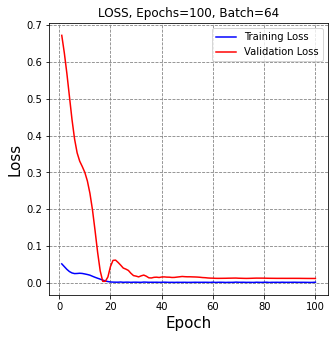

In [ ]:
plotLearningCurve(r,epochnum,batchnum)

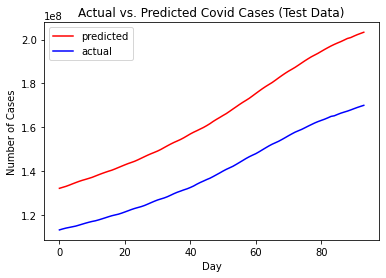

In [ ]:
Y_pred = model.predict(X_test)
Y_pred = scaler.inverse_transform(Y_pred)
Y_test = scaler.inverse_transform(Y_test.reshape(-1,1))
Y_train = scaler.inverse_transform(Y_train.reshape(-1,1))
plt.plot(Y_pred, color='red')
plt.plot(Y_test, color='blue')
plt.title('Actual vs. Predicted Covid Cases (Test Data)')
plt.ylabel('Number of Cases')
plt.xlabel('Day')
plt.legend(['predicted', 'actual'])

In [ ]:
Y_train = Y_train.reshape(-1)
Y_test = Y_test.reshape(-1)
Y_pred = Y_pred.reshape(-1)

In [ ]:
date_array = np.array(time_series_data['ObservationDate'].values)
date_train = date_array[:split]
date_test = date_array[split:]

In [ ]:
trace1 = go.Scatter(
    x = date_train,
    y = Y_train,
    mode = 'lines',
    name = 'Data'
)
trace2 = go.Scatter(
    x = date_test,
    y = Y_pred,
    mode = 'lines',
    name = 'Prediction'
)
trace3 = go.Scatter(
    x = date_test,
    y = Y_test,
    mode='lines',
    name = 'Ground Truth'
)
layout = go.Layout(
    title = "<b>Confirmed Cases</b>",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "Cases"}
)
fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
fig.show()

In [ ]:
T = 5
prediction_list = dataset_n[-T:]  #take last 100 values from the dataset
num_prediction = 30 #predicting cases for next 1 month
for _ in range(num_prediction):
    x = prediction_list[-T:]
    x = x.reshape((1,T, 1))
    out = model.predict(x)[0][0]
    prediction_list = np.append(prediction_list, out) #appending the prediction
prediction_list = prediction_list[T-1:] 
prediction_list = scaler.inverse_transform(np.array(prediction_list).reshape(-1,1)).reshape(-1)


last_date = time_series_data['ObservationDate'].values[-1]
prediction_dates = np.array(pd.date_range(last_date, periods=num_prediction+1))

In [ ]:
trace1 = go.Scatter(
    x = date_array,
    y = dataset.reshape(-1),
    mode = 'lines',
    name = 'Data'
)
trace2 = go.Scatter(
    x = prediction_dates,
    y = prediction_list,
    mode = 'lines',
    name = 'Forecast'
)

layout = go.Layout(
    title = "<b>Confirmed Cases</b>",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "Cases"}
)
fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()